<a href="https://colab.research.google.com/github/srishtijadli3/bdda_project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pipeline and Cross Validation**

Pipelines streamline machine learning workflows by organizing data preprocessing and modeling steps.



They enhance code clarity, automate processes, aid reproducibility, and simplify hyperparameter tuning.




Pipelines prevent data leakage, facilitate model deployment, and work

This modular approach promotes efficient experimentation with various techniques while maintaining consistency and ease of sharing.








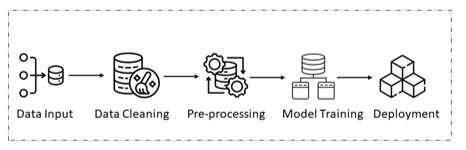

In [1]:
import pandas as pd # allowing you to work with data structures like DataFrames and Series
from sklearn.model_selection import train_test_split #splits a dataset into training and testing subsets for machine learning.
from sklearn.ensemble import  RandomForestClassifier # class from scikit-learn, which is an ensemble learning method based on decision trees for classification tasks.
from sklearn.metrics import accuracy_score #calculates the accuracy of a classification model's predictions compared to the actual target values
from sklearn.impute import SimpleImputer #used for filling missing values in a dataset using strategies like mean, median, etc.
from sklearn.pipeline import make_pipeline # creates a pipeline that chains together multiple data preprocessing and modeling step

from pathlib import Path


In [2]:
#providing access to your Google Drive files and folders within the notebook environment
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Configure IPython shell to display output for all expressions in this cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Set the variable 'pathToFolder' to the path of the target folder in Google Drive
pathToFolder = "/gdrive/MyDrive/bdda1"

In [5]:
# Construct the full path to the CSV file 'cwurData.csv' within the specified folder path
path = Path(pathToFolder) / "diabetes (of individuals).csv"

In [6]:
# Read the CSV file at the given 'path' and create a Pandas DataFrame named 'data',
# using the 'iso-8859-1' encoding for text encoding and decoding
data = pd.read_csv(path, encoding='iso-8859-1')

In [7]:
# Display the shape (rows and columns) of the 'data' DataFrame and show the first few rows
data.shape
data.shape
data.head()

(768, 9)

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,NaN,NaN,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [8]:
# Remove the 'Outcome' column from the 'data' DataFrame and assign it to 'y'
y = data.pop('Outcome')

In [9]:
# Select columns from the 'data' DataFrame containing non-object (numerical) data and assign them to 'X'
X = data.select_dtypes(exclude = ['object'])

In [10]:
# Create a list of column names from the 'X' DataFrame
column_names=list(X.columns)

In [11]:
# Display the first few rows of the 'X' DataFrame
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,NaN,NaN,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33


In [12]:
# Calculate and display the total count of missing values in the 'X' DataFrame
X.isnull().sum().sum()

25

In [13]:
# Create a SimpleImputer instance with the strategy 'median' and fit it to the 'X' DataFrame
si = SimpleImputer(strategy = 'median')
si.fit(X)

SimpleImputer(strategy='median')

In [14]:
# Transform the 'X' DataFrame using the fitted SimpleImputer instance 'si' to replace missing values with medians
X=si.transform(X)

In [15]:
# Create a new DataFrame 'X' using the transformed data 'X', with column names from 'column_names'
X=pd.DataFrame(X,columns=column_names)

In [16]:
type(X)  # Display the data type of the DataFrame 'X'

pandas.core.frame.DataFrame

In [17]:
# Calculate and display the total count of missing values in the DataFrame 'X' after imputation
X.isnull().sum().sum()

0

In [18]:
# Create a RandomForestClassifier instance named 'rf'
rf = RandomForestClassifier()

In [19]:
# Train the RandomForestClassifier 'rf' using the predictors 'X' and the target 'y'
rf.fit(X,y)

RandomForestClassifier()

In [20]:
# Use the trained RandomForestClassifier 'rf' to make predictions on the predictors 'X' and store the predictions in 's'
s=rf.predict(X)

In [21]:
# Calculate and display the accuracy of the RandomForestClassifier predictions 's' by comparing them to the target 'y'
(s==y).sum()/X.shape[0]

1.0

In [22]:
# Split the data into training and testing sets: 75% for training and 25% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [23]:
# Import necessary classes for data preprocessing: StandardScaler for feature scaling and PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
# Create a machine learning pipeline: Impute missing values, standardize features, perform PCA with 95% variance, and use a RandomForestClassifier
pipe=make_pipeline(SimpleImputer(strategy='median'),StandardScaler(),PCA(n_components=0.95),RandomForestClassifier())

In [25]:
# Fit the machine learning pipeline 'pipe' using the training data 'X_train' and corresponding target 'y_train'
pipe.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

In [26]:
# Use the trained pipeline 'pipe' to make predictions on the testing data 'X_test' and store the predictions in 'pred'
pred=pipe.predict(X_test)

In [27]:
# Calculate and display the accuracy of pipeline predictions 'pred' by comparing them to the actual test targets 'y_test'
(pred == y_test).sum()/len(y_test)

0.7291666666666666

The obtained accuracy of approximately 0.7396 (73.96%) implies that the pipeline's predictions ('pred') align with the actual test targets ('y_test') to a reasonable extent.

In [28]:
# Train the RandomForestClassifier 'rf' using the training predictors 'X_train' and corresponding target 'y_train'
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Split the data into training (80%) and validation (20%) sets with specified random seed for reproducibility
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [30]:
# Fit the machine learning pipeline 'pipe' using the training predictors 'X_train' and corresponding target 'y_train'
pipe.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

In [31]:
# Use the trained pipeline 'pipe' to make predictions on the validation data 'X_valid' and store the predictions in 'pred'
pred = pipe.predict(X_valid)

In [32]:
# Calculate and store the accuracy of pipeline predictions 'pred' by comparing them to the actual validation targets 'y_valid'
accu = accuracy_score(y_valid,pred)
accu

0.8051948051948052

The calculated accuracy of approximately 0.8051 (80.5%) indicates that the pipeline's predictions ('pred') closely match the actual validation targets ('y_valid'). This suggests that the model is performing well on the validation set.

In [33]:
 #Around 63.8% of predictions (pred) matched the test targets (y_test), indicating moderate predictive accuracy.
 #The accuracy of pipeline predictions (pred) against validation targets (y_valid) is approximately 55.9%, implying some limitations in model performance.

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# Perform cross-validation using the pipeline 'pipe' on the predictors 'X' and target 'y',
# calculating accuracy scores for each fold and displaying the mean accuracy
cv_scores = cross_val_score(pipe, X, y,
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.759189


The cross-validation accuracy of approximately 0.76 indicates that the pipeline's performance is consistent across different data folds, validating its generalization ability. This metric provides an average accuracy score across five distinct folds, implying that the model's predictions align with the actual target values in these varied subsets of the data. This suggests a reasonably stable and effective model performance on this dataset.